In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- Import dataset, which is [star_types dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset?resource=download)
- Headernames and index names are not set since it is already given in the dataset
- We use `dataset.info()` to check the data types of each column and if there are any missing values

In [50]:
path = '../data/star_classification.csv'

dataset = pd.read_csv(path)
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


- We then get the values of the dataset and store it in `X` and `y` variables
- `X` will be the features of the dataset, which are the columns `Temperature`, `Luminosity`, and `Absolute Magnitude` (which is based on the Hertzsprung-Russell Diagram. The missing feature considered is the `Color` which must be converted to numerical values depending on the categorical values)
- `y` will be the classification of the dataset, which is the column `Star type`
- The `Star type` is divided into 6 classifications:
  - 0 = Red dwarf
  - 1 = Brown dwarf
  - 2 = White dwarf
  - 3 = Main sequence
  - 4 = Super Giants
  - 5 = Hyper Giants

In [17]:
X = dataset.iloc[1:, [0,1,3]].values
y = dataset.iloc[1:, -3].values

- we now then split the whole data set into training data set and test data set using `train_test_split`. We use 70% as a training data and 30% (test_size = 0.30) as our test data. 
- We then use `StandardScaler` to scale the data set to a standard normal distribution. This is to avoid the model to be biased to the features with higher values.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size
= 0.20)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- We then use `KNeighborsClassifier` to train the model. We use `n_neighbors = 5` as our parameter. This means that the model will use the 5 nearest neighbors to classify the data. We then use `model.score` to check the accuracy of the model. 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

- We then use the `.predict()` to utilize trained model for prediction. We feed the `x values` as an argument for the function 
- We can either use the test dataset and train dataset a an argument for the prediction. 
- Naming convention used for the variable name must include the `y_pred` + `(type of x_value that is feeded, either test or train)` + `knn` + `(number of neighbors used)`

In [20]:
y_pred_train_5 = classifier.predict(X_train)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
y_pred_train_5_confusionMatrix = confusion_matrix(y_train, y_pred_train_5)
print("Confusion Matrix:")
print(y_pred_train_5_confusionMatrix)
result1 = classification_report(y_train, y_pred_train_5)
print("Classification Report:",)
print (result1)
y_pred_train_5_acc = accuracy_score(y_train,y_pred_train_5)
print("Accuracy:",y_pred_train_5_acc)

Confusion Matrix:
[[31  0  0  0  0  0]
 [ 0 30  0  0  0  0]
 [ 0  0 31  0  0  0]
 [ 0  0  0 31  0  0]
 [ 0  0  0  2 26  5]
 [ 0  0  0  0  6 29]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        31
           3       0.94      1.00      0.97        31
           4       0.81      0.79      0.80        33
           5       0.85      0.83      0.84        35

    accuracy                           0.93       191
   macro avg       0.93      0.94      0.93       191
weighted avg       0.93      0.93      0.93       191

Accuracy: 0.9319371727748691


In [47]:
classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_3.fit(X_train, y_train)
y_pred_train_3 = classifier_3.predict(X_train)
y_pred_train_3_acc = accuracy_score(y_train, y_pred_train_3)
y_pred_train_3_confusionMatrix = confusion_matrix(y_train, y_pred_train_3)
y_pred_train_3_classificationReport = classification_report(y_train, y_pred_train_3)

classifier_7 = KNeighborsClassifier(n_neighbors=7)
classifier_7.fit(X_train, y_train)
y_pred_train_7 = classifier_7.predict(X_train)
y_pred_train_7_acc = accuracy_score(y_train, y_pred_train_7)
y_pred_train_7_confusionMatrix = confusion_matrix(y_train, y_pred_train_7)
y_pred_train_7_classificationReport = classification_report(y_train, y_pred_train_7)

classifier_1 = KNeighborsClassifier(n_neighbors=1)
classifier_1.fit(X_train, y_train)
y_pred_train_1 = classifier_1.predict(X_train)
y_pred_train_1_acc = accuracy_score(y_train, y_pred_train_1)
y_pred_train_1_confusionMatrix = confusion_matrix(y_train, y_pred_train_1)
y_pred_train_1_classificationReport = classification_report(y_train, y_pred_train_1)

dict = {
    "KNN 1 (Train)" : [y_pred_train_1_acc],
    "KNN 3 (Train)" : [y_pred_train_3_acc],
    "KNN 5 (Train)" : [y_pred_train_5_acc],
    "KNN 7 (Train)" : [y_pred_train_7_acc]
}
accuracy_table = pd.DataFrame(dict).transpose()
accuracy_table.columns = ["Accuracy Score"]
accuracy_table

,Accuracy Score
KNN 1 (Train),1.000000
KNN 3 (Train),0.947644
KNN 5 (Train),0.931937
KNN 7 (Train),0.900524


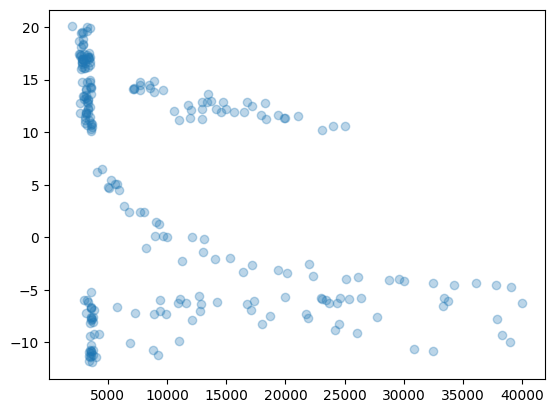

In [58]:
plot_y = dataset['Absolute magnitude(Mv)']
plot_x = dataset['Temperature (K)']

plt.scatter(plot_x, plot_y, alpha=0.3)

plot_y = dataset['Luminosity(L/Lo)']


plt.show()